<a href="https://colab.research.google.com/github/sammorozov/FINOdays_task5/blob/main/FINOdays_5_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import tree
import graphviz

from yellowbrick.model_selection import FeatureImportances

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/UCI_Credit_Card.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
print(df.info())

df = df.drop(columns=['ID'])

df = df.dropna()

df['SEX'] = df['SEX'].map({'male': 0, 'female': 1})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [30]:
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [36]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train_imputed,y_train)
dt.score(X_test_imputed, y_test)

0.8211666666666667

In [37]:
X_train = X_train_imputed
X_test = X_test_imputed

In [38]:
model = dt

предсказание Дефолта на трэйне и тесте

In [40]:
y_train_pred = model.predict_proba(X_train)[:, 1]
y_test_pred = model.predict_proba(X_test)[:, 1]


roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)


print("ROC AUC на трейне:", roc_auc_train)
print("ROC AUC на тесте:", roc_auc_test)



ROC AUC на трейне: 0.7353000655185334
ROC AUC на тесте: 0.7263155645462299


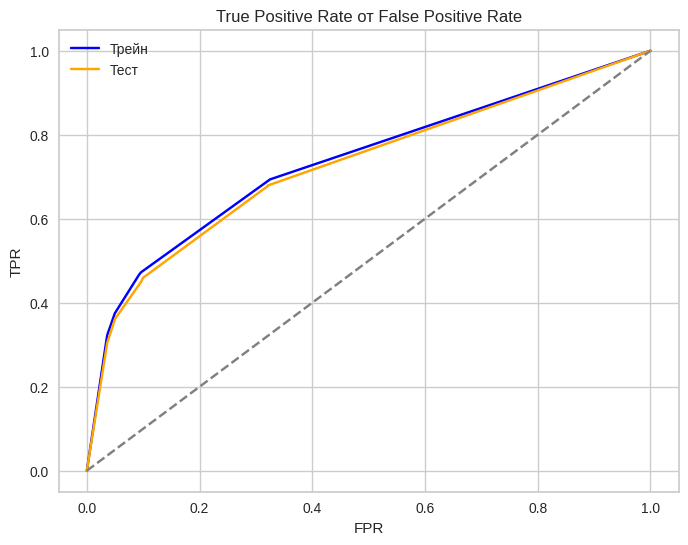

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='Трейн', color='blue')
plt.plot(fpr_test, tpr_test, label='Тест', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('True Positive Rate от False Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

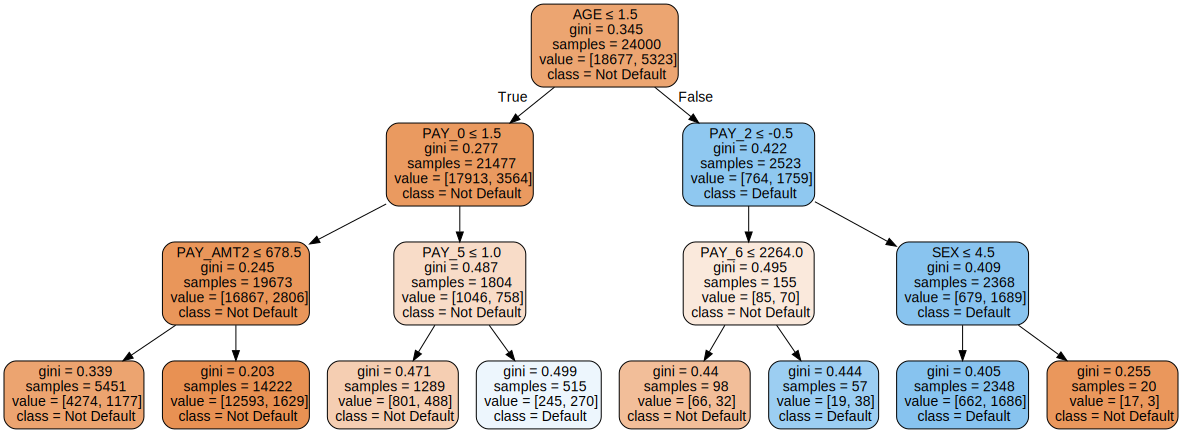

In [55]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns.tolist()[:-1],
                           class_names=['Not Default', 'Default'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data, format='png', engine='dot')
graph

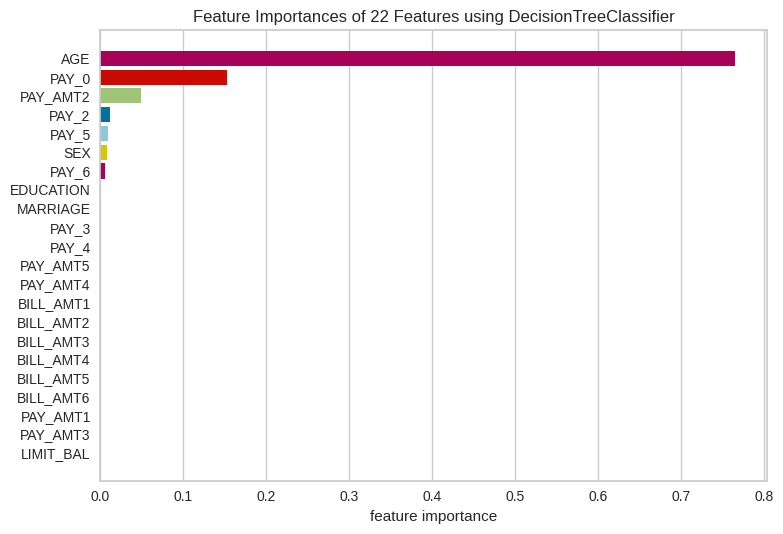

<Axes: title={'center': 'Feature Importances of 22 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [56]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train_imputed, y_train)

feature_names = X.columns.tolist()[:-1]
viz = FeatureImportances(dt, labels=feature_names, relative=False)
viz.fit(X_train_imputed, y_train)
viz.show()

# Определяющие факторы вероятности дефолта:

Определяющие факторы вероятности дефолта:


1.   Возраст заемщика: Молодые люди могут иметь более высокую вероятность дефолта из-за нестабильности финансовых обязательств и ограниченного опыта работы.

2.   Состояние платежей за счет в разные периоды времени (PAY_0, PAY_2, PAY_5, PAY_6): Заемщики с постоянными задержками платежей (например, значение 2 или более) могут иметь повышенную вероятность дефолта, чем те, кто платит вовремя или с небольшими задержками.



3.   Сумма платежа за счет в предыдущем месяце (PAY_AMT2): Заемщики, выплачивающие большие суммы долга, могут иметь более низкую вероятность дефолта, чем те, кто выплачивает только минимальные суммы.

4.   Пол заемщика (SEX): Исследования показывают, что мужчины и женщины могут иметь различные финансовые привычки и поведение при управлении долгами, что влияет на их вероятность дефолта.



